#### KNN to predict customers who are likely to churn

With KNN, we predicted the customers who are likely to churn with 79% accuracy

In [22]:
##import needed modules
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
%pylab inline
import copy
# import the file
df = pd.read_csv(r'Churn_Modelling.csv',error_bad_lines=False)

# Drop unnecessary columns
df2= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) 
#create design matrices
Y, X = dmatrices('Exited ~ 0 + CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary', df2, return_type="dataframe")


Populating the interactive namespace from numpy and matplotlib


# Random Sample KNN

In [24]:
#split up data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#set up the classifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=30,
                                       weights='uniform',
                                       p=2)

#fit the classifier
model.fit(X_train, y_train)

#run on training data
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print "Model accuracy of training dataset is: ",metrics.accuracy_score(y_train, prediction_on_training) 

# Predict accuracy on test dataset
predicted_classes = model.predict(X_test)
print "Model accuracy of test dataset is: ",metrics.accuracy_score(y_test, predicted_classes)

C:\Users\AsuS\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


Model accuracy of training dataset is:  0.7985714285714286
Model accuracy of test dataset is:  0.791


In [12]:
#Varying model paramters
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

('train indices =', array([1, 2, 4, 5]), 'holdout indices =', array([0, 3]))
('train indices =', array([0, 2, 3, 5]), 'holdout indices =', array([1, 4]))
('train indices =', array([0, 1, 3, 4]), 'holdout indices =', array([2, 5]))


In [20]:
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y.iloc[train]
        y_holdout = y.iloc[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

C:\Users\AsuS\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0,0.5,'Accuracy of classifier')

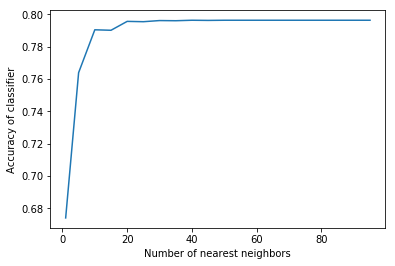

In [21]:
#Get the corresponding cross-validation accuracy scores
scores= [cv_accuracy_score(X, Y, num_nbrs) for num_nbrs in nn]

#plot accuracy scores versus the number of nearest neighbors
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

##### Finding:
- k~ 25-30 looks like it would be good 